In [1]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install scikit-learn-extra

In [4]:
!pip install kneed

In [5]:
# Pip 21.3+ is required
!pip install xgboost

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.membership import gaussmf
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [7]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [8]:
# import data set
df=pd.read_csv(r"C:\Users\Moustafa\Desktop\Mental Health Dataset.csv")

In [9]:
#Display all data set
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [10]:
#Unique values in data
df.nunique()

Timestamp                  580
Gender                       2
Country                     35
Occupation                   5
self_employed                2
family_history               2
treatment                    2
Days_Indoors                 5
Growing_Stress               3
Changes_Habits               3
Mental_Health_History        3
Mood_Swings                  3
Coping_Struggles             2
Work_Interest                3
Social_Weakness              3
mental_health_interview      3
care_options                 3
dtype: int64

In [11]:
# Display the top 20 rows of data set
df.head(20)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [12]:
# Display the last 20 rows of data set
df.tail(20)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292344,2/21/2015 9:30,Male,United Kingdom,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Not sure
292345,2/21/2015 9:48,Male,United States,Business,No,No,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292346,2/21/2015 10:00,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292347,2/21/2015 17:19,Male,Netherlands,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Not sure
292348,2/21/2015 18:59,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292349,2/22/2015 2:40,Male,Greece,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292350,2/24/2015 9:00,Male,United Kingdom,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Yes,Yes
292351,2/24/2015 9:13,Male,United Kingdom,Business,No,No,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292352,2/24/2015 9:18,Male,Canada,Business,No,No,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292353,2/24/2015 10:32,Male,United States,Business,No,No,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No


In [13]:
# Our dataset is shape
df.shape

(292364, 17)

In [14]:
# Describe dataset
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [15]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [16]:
#Unique values in data
df.nunique()

Timestamp                  580
Gender                       2
Country                     35
Occupation                   5
self_employed                2
family_history               2
treatment                    2
Days_Indoors                 5
Growing_Stress               3
Changes_Habits               3
Mental_Health_History        3
Mood_Swings                  3
Coping_Struggles             2
Work_Interest                3
Social_Weakness              3
mental_health_interview      3
care_options                 3
dtype: int64

In [17]:
# Check if dataset has null values
df.isnull()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292360,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292361,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292362,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# Checking for Missing Values
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


WE found 1 feature only has null values (self_employed ) around   5202 value of 292364 , 
we start clean it


In [19]:
# We display the feature which has null values
df["self_employed"].describe()

count     287162
unique         2
top           No
freq      257994
Name: self_employed, dtype: object

In [20]:
# Filling  Missing Values with a previous value
df["self_employed"]=df["self_employed"].fillna(method="bfill")
df["self_employed"]

C:\Users\Moustafa\AppData\Local\Temp\ipykernel_10336\7613181.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["self_employed"]=df["self_employed"].fillna(method="bfill")


0          No
1          No
2          No
3          No
4          No
         ... 
292359    Yes
292360     No
292361     No
292362     No
292363     No
Name: self_employed, Length: 292364, dtype: object

In [21]:
# We check if df["self_employed"] still has null values or not
df["self_employed"].isnull().sum()

0

In [22]:
# Remove duplicate rows if exsists
df=df.drop_duplicates()

In [23]:
# We have around x rows asr duplicated
Num_of_Duplicated_rows=(292364 - 290051) 
Num_of_Duplicated_rows


2313

In [24]:
#shape of data after cleaning
df.shape

(290051, 17)

In [25]:
# Descibe data after cleaning to check if we have wrong data
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2381,237900,169112,65906,257004,175518,146184,63113,99300,108788,103313,100384,153031,105012,102577,229889,117614


In [26]:
# start fuzzy logic with  define input variables
Gender = ctrl.Antecedent(np.arange(0, 2, 1), 'Gender')
Growing_Stress = ctrl.Antecedent(np.arange(0, 2, 1), 'Growing_Stress')
Mood_Swings = ctrl.Antecedent(np.arange(0, 11, 1), 'Mood_Swings')	
Changes_Habits = ctrl.Antecedent(np.arange(0, 2, 1), 'Changes_Habits')
family_history = ctrl.Antecedent(np.arange(0, 2, 1), 'family_history')
mental_health_interview = ctrl.Antecedent(np.arange(0, 11, 1), 'mental_health_interview')	

In [27]:
# Define output variable
Mental_Health_History = ctrl.Consequent(np.arange(0, 2, 1), 'Mental_Health_History')

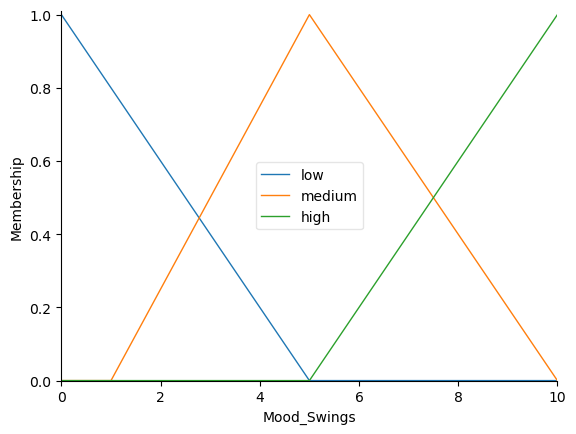

In [28]:
# Define membership functions for input variables
Mood_Swings['low'] = fuzz.trimf(Mood_Swings.universe, [0, 0, 5])
Mood_Swings['medium'] = fuzz.trimf(Mood_Swings.universe, [1, 5, 10])
Mood_Swings['high'] = fuzz.trimf(Mood_Swings.universe, [5,10, 10])
Mood_Swings.view()

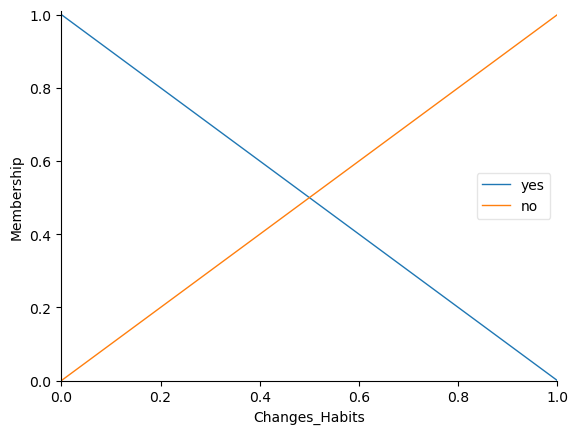

In [29]:
Changes_Habits['yes'] = fuzz.trimf(Changes_Habits.universe, [0, 0, 1])
Changes_Habits['no'] = fuzz.trimf(Changes_Habits.universe, [0, 1, 1])
Changes_Habits.view()

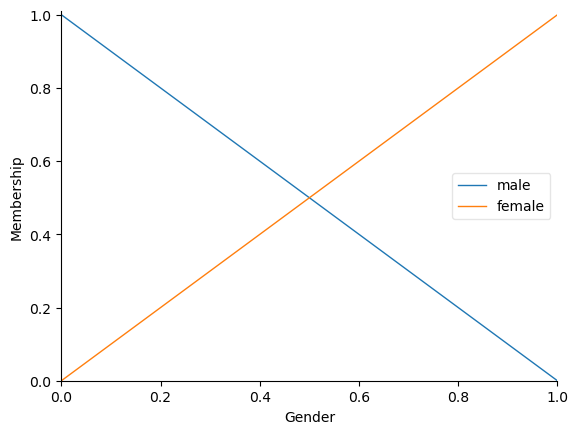

In [30]:
Gender['male'] = fuzz.trimf(Gender.universe, [0, 0, 1])
Gender['female'] = fuzz.trimf(Gender.universe, [0, 1, 1])
Gender.view()

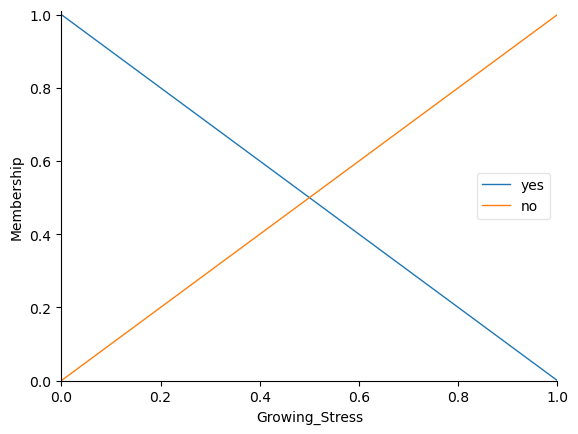

In [31]:
Growing_Stress['yes'] = fuzz.trimf(Growing_Stress.universe, [0, 0, 1])
Growing_Stress['no'] = fuzz.trimf(Growing_Stress.universe, [0, 1, 1])
Growing_Stress.view()

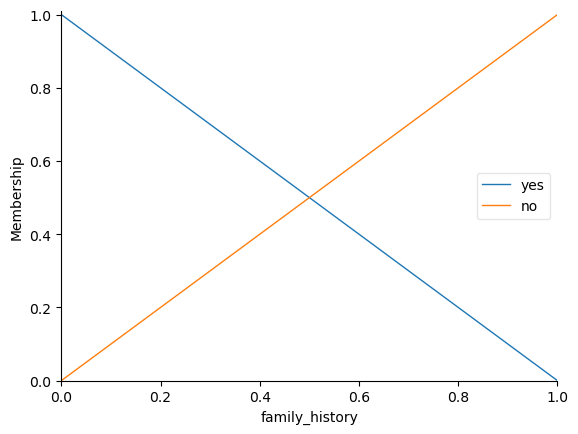

In [32]:
family_history['yes'] = fuzz.trimf(family_history.universe, [0, 0, 1])
family_history['no'] = fuzz.trimf(family_history.universe, [0, 1, 1])
family_history.view()

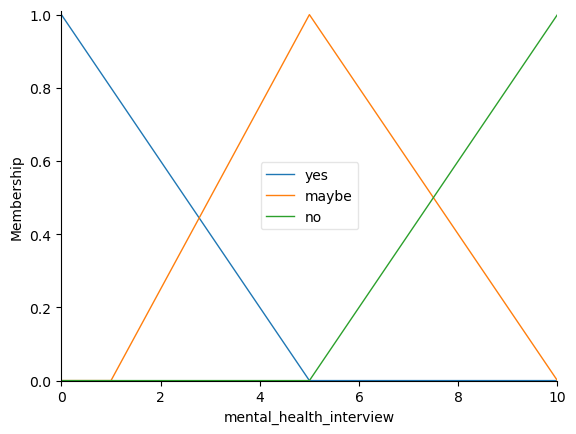

In [33]:
mental_health_interview['yes'] = fuzz.trimf(mental_health_interview.universe, [0, 0, 5])
mental_health_interview['maybe'] = fuzz.trimf(mental_health_interview.universe, [1, 5, 10])
mental_health_interview['no'] = fuzz.trimf(mental_health_interview.universe, [5,10, 10])
mental_health_interview.view()

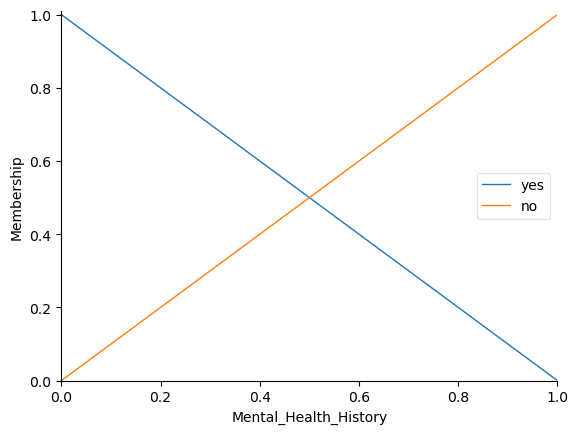

In [34]:
# Define membership functions for the output variable
Mental_Health_History['yes'] = fuzz.trimf(Mental_Health_History.universe, [0, 0, 1])
Mental_Health_History['no'] = fuzz.trimf(Mental_Health_History.universe, [0, 1, 1])
Mental_Health_History.view()

In [35]:
# Define fuzzy rules
rule1 = ctrl.Rule(Mood_Swings['high'] | Growing_Stress['yes'] | (Changes_Habits['yes'] & Gender['male']), Mental_Health_History['yes'])
rule2 = ctrl.Rule(Mood_Swings['high'] | (Changes_Habits['no'] & Gender['female'])& family_history['no'],Mental_Health_History['no'])
rule3 = ctrl.Rule(Growing_Stress['yes'] | Changes_Habits['yes']& Gender['male'],Mental_Health_History['yes'])
rule4 = ctrl.Rule(Gender['male'] & Growing_Stress['no']& mental_health_interview['yes'],Mental_Health_History['no'])
rule5 = ctrl.Rule(mental_health_interview['maybe'] | (Changes_Habits['yes'] & family_history['yes'])& Gender['female'],Mental_Health_History['yes'])
rule6 = ctrl.Rule(Mood_Swings['low'] & Growing_Stress['no'] & (Gender['male'] | family_history['no'])& mental_health_interview['no'],Mental_Health_History['no'])

In [36]:
# Create the control system
mental_health_ctrl = ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6])
mental_health_sim = ctrl.ControlSystemSimulation(mental_health_ctrl)


In [37]:
# Provide inputs
mental_health_sim.input['Mood_Swings'] = 0
mental_health_sim.input['Gender'] = 1
mental_health_sim.input['Changes_Habits'] = 0
mental_health_sim.input['mental_health_interview'] = 1
mental_health_sim.input['Growing_Stress'] = 0
mental_health_sim.input['family_history'] = 1

In [38]:
# Compute the output
mental_health_sim.compute()

In [39]:
# Print the output
print("Mental health history result:", mental_health_sim.output['Mental_Health_History'])

Mental health history result: 0.3333333333333333


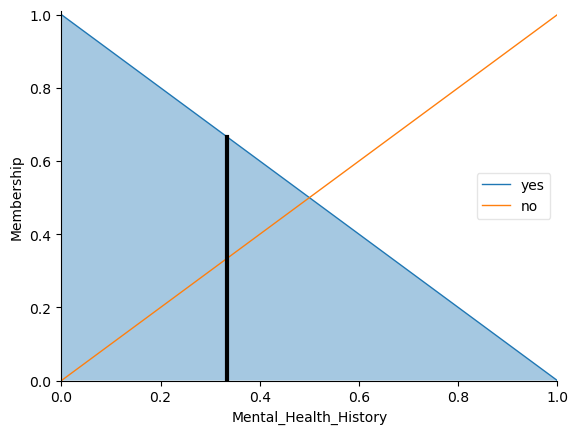

In [40]:
# Visualize the membership functions and rules
Mental_Health_History.view(mental_health_sim)

In [41]:
#make a copy of the data frame to encode labels
df1=df.copy()

In [42]:
#transform each categorical column into numerical labels. 
label_encoders = {}
for column in df1.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    df1[column] = label_encoders[column].fit_transform(df1[column])

In [43]:
#not relevant for clustering in this context
df = df.drop(columns=["Timestamp"])
df1=df1.drop(columns=["Timestamp"])

In [86]:
# Subset the data to a random sample of 10,000 rows for faster computation
#subset_df = df1.sample(n=10000, random_state=5)

subset_size = 1000 
# Randomly sample a subset of the data
subset_indices = np.random.choice(df1.index, size=subset_size, replace=False)
subset_df = df1.loc[subset_indices]

In [87]:
#k=2
for k in range(2,min(10, subset_df.shape[0] - 1)):
    kmedoids=KMedoids(n_clusters=k).fit(subset_df)
    y_kmed=kmedoids.fit_predict(subset_df)
    clusters=kmedoids.cluster_centers_
    labels=kmedoids.labels_
   

In [88]:
print("labels:",labels,"\n")
print("clusters:",clusters,"\n")
for j in range (k):
    for i in range(len(subset_df)):
        if(kmedoids.labels_[i]==j):
            x = subset_df.iloc[i]
            print("cluster",j,":",x)

labels: [8 0 2 1 0 4 4 5 7 2 5 8 1 5 1 0 0 0 8 5 5 1 6 0 2 3 2 5 0 4 8 6 6 4 3 8 2
 0 1 6 4 2 0 8 5 7 0 1 6 6 8 0 4 1 0 5 4 0 4 1 8 8 8 4 0 4 1 3 5 8 0 1 6 6
 2 5 3 8 8 5 6 1 2 6 3 1 2 3 3 2 1 1 1 0 5 4 4 4 2 1 3 0 0 3 0 4 4 0 1 1 1
 5 4 4 8 1 8 2 2 7 5 0 1 0 3 6 2 6 5 8 1 2 1 0 2 0 6 6 2 2 4 6 2 2 4 2 2 6
 8 4 1 2 1 4 2 2 4 4 8 2 4 7 1 4 4 2 6 6 0 5 7 1 2 3 4 5 8 4 1 1 8 6 6 1 3
 2 3 2 4 5 6 2 2 1 1 3 4 0 7 5 2 6 0 6 6 2 1 1 4 8 1 8 4 6 7 4 2 6 2 0 4 7
 1 6 5 8 1 5 3 0 1 4 4 1 8 8 1 4 0 4 2 4 5 7 3 8 1 0 8 1 0 2 0 1 2 8 2 3 6
 7 2 4 4 6 0 4 0 4 4 8 2 0 0 8 2 6 0 8 1 2 4 2 0 4 8 6 0 1 2 0 5 1 1 4 1 1
 4 1 7 0 0 4 6 8 7 1 2 0 0 2 4 2 0 3 5 2 0 0 8 1 4 0 4 8 1 1 5 4 2 0 6 6 4
 0 7 0 5 6 7 0 2 0 4 0 6 0 1 0 2 1 1 2 6 1 8 0 2 8 4 2 6 0 6 6 0 1 6 1 8 8
 2 8 2 0 1 1 6 1 0 1 8 4 1 6 0 1 8 2 2 2 1 5 6 6 4 1 1 0 2 6 2 6 5 6 6 6 2
 0 7 5 8 0 1 4 1 4 5 3 6 6 4 8 6 6 7 7 4 4 0 7 8 0 8 2 2 1 6 0 7 4 5 4 6 0
 4 2 4 1 1 4 0 6 2 1 8 1 7 2 8 4 5 1 1 3 8 1 6 2 8 0 4 4 2 3 3 5 5 7 6 0 4
 5 6 1 0 0 2 0 0 

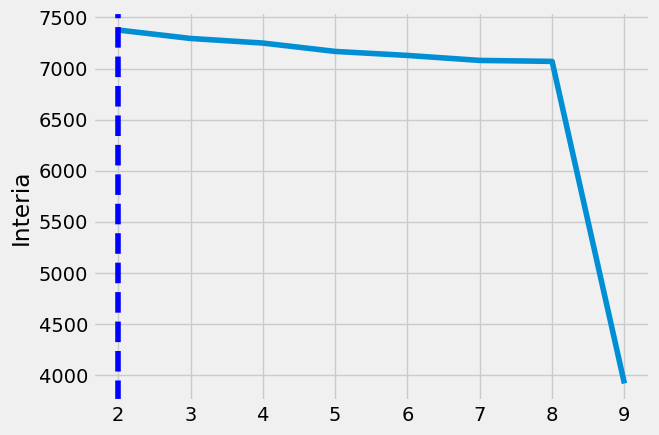

In [89]:
List = []
for k in range(2,min(10, subset_df.shape[0] - 1)):
    kmedoids=KMedoids(n_clusters=k).fit(subset_df)
    List.append( kmedoids.inertia_) 

kl = KneeLocator(range(2,min(10, subset_df.shape[0] - 1)), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(2,min(10, subset_df.shape[0] - 1)),List)
plt.xticks(range(2,min(10, subset_df.shape[0] - 1)))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

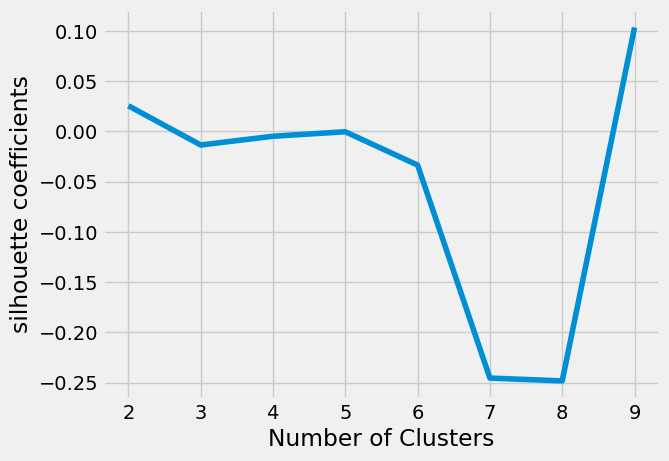

In [90]:
silhouette_coefficients = []
for k in range(2,min(10, subset_df.shape[0] - 1)):
    kmedoids=KMedoids(n_clusters=k).fit(subset_df)
    score = silhouette_score(subset_df, kmedoids.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,min(10, subset_df.shape[0] - 1)), silhouette_coefficients)
plt.xticks(range(2,min(10, subset_df.shape[0] - 1)))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [91]:
max(silhouette_coefficients)

0.10343366383502597

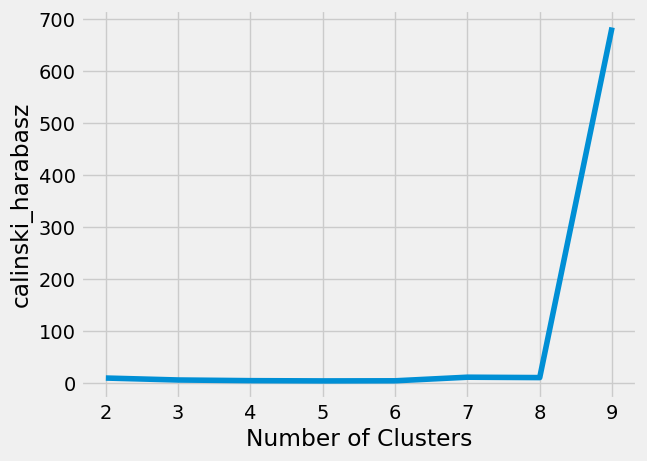

In [92]:
calinski_harabaz = []
for k in range(2,min(10, subset_df.shape[0] - 1)):
    kmedoids=KMedoids(n_clusters=k).fit(subset_df)
    metrics.calinski_harabasz_score(subset_df, kmedoids.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(subset_df, kmedoids.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,min(10, subset_df.shape[0] - 1)), calinski_harabaz)
plt.xticks(range(2,min(10, subset_df.shape[0] - 1)))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [93]:
max(calinski_harabaz)

683.3289993157423

In [61]:
X = df1.drop("Mood_Swings", axis = 1)
y = df1["Mood_Swings"]

In [95]:
# view normal cluster centers
kmediod = KMedoids(n_clusters=9,init= "random", random_state = 5)
kmediod.fit(subset_df)
label = kmediod.labels_
cluster_centers = pd.DataFrame(data = kmediod.cluster_centers_, columns = [df1.columns])
cluster_centers

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,1.0,34.0,2.0,0.0,1.0,1.0,3.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0
1,1.0,33.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0
2,1.0,4.0,2.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0
3,1.0,34.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
4,1.0,16.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0
5,0.0,34.0,3.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0
6,1.0,34.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
7,1.0,34.0,4.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0
8,1.0,34.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0


In [96]:
#Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1000, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(289051, 15) (1000, 15)
(289051,) (1000,)


In [97]:
def purity_score(y_true,y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,y_pred)
    return np.sum(np.amax(contingency_matrix , axis= 0)) / np.sum(contingency_matrix)

In [98]:
# Compute the purity score of the clustering
purity = purity_score(y_test, y_kmed)
print(purity)

0.388


In [99]:
# Compute the silhouette score of the clustering
silhouette = silhouette_score(subset_df, y_kmed)
print(f"Silhouette score: {silhouette:.3f}")

Silhouette score: 0.103


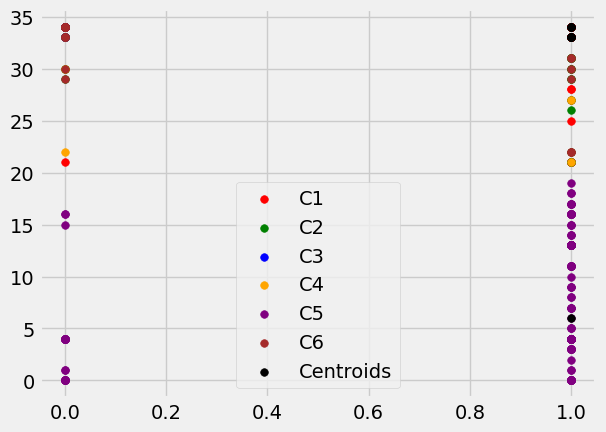

In [102]:
# Select the first two columns of subset_df for plotting
subset_df_plot = subset_df.iloc[:, :2]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown','pink','cyan']
# Plot the data points colored by their cluster labels
for i in range(6):
    cluster_mask = y_kmed == i
    cluster_df = subset_df_plot[cluster_mask]
    plt.scatter(cluster_df.iloc[:, 0], cluster_df.iloc[:, 1], s=30, c=colors[i], label=f'C{i+1}')

plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s=30, c='black', label='Centroids')
plt.legend()

In [103]:
# Compute the cluster sizes and print them to the console
cluster_sizes = np.bincount(y_kmed)
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size}")

Cluster sizes:
Cluster 0: 135
Cluster 1: 158
Cluster 2: 145
Cluster 3: 48
Cluster 4: 164
Cluster 5: 82
Cluster 6: 131
Cluster 7: 41
Cluster 8: 96


In [81]:
def countsplot(category):
  """
  Creates a count plot and returns a DataFrame with counts and percentages.

  Args:
      category (str): The column name for the categorical variable to plot.

  Returns:
      pandas.DataFrame: A DataFrame containing counts and percentages for each category.
  """
    # Create count plot with dynamic title
  sns.countplot(data = df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = df[category].value_counts()
  category_percentages = df[category].value_counts(normalize = True)
# Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

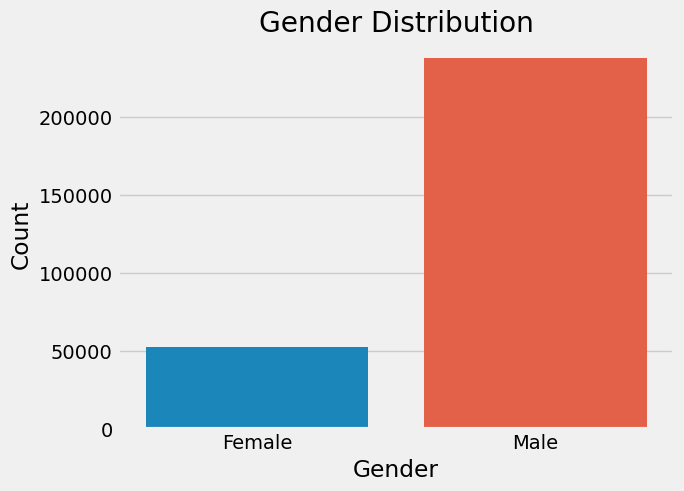

,Count,Proportion
Gender,,
Male,"237,900",82.0%
Female,"52,151",18.0%


In [82]:
countsplot('Gender')

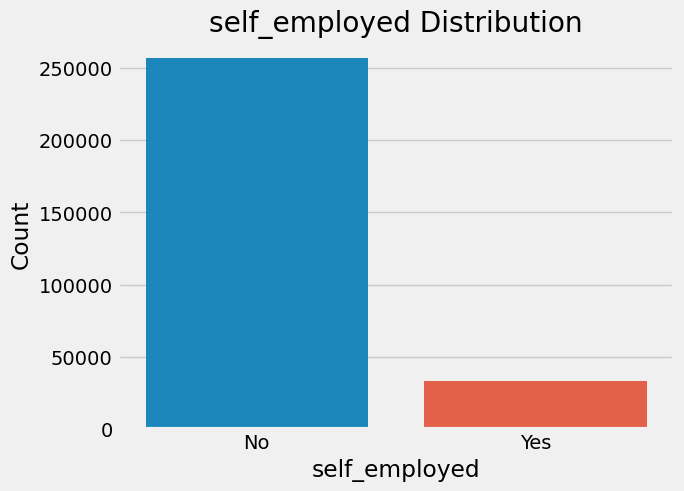

,Count,Proportion
self_employed,,
No,"257,004",88.6%
Yes,"33,047",11.4%


In [83]:
countsplot('self_employed')

In [ ]:
countsplot("family_history")

In [ ]:
countsplot("treatment")

In [ ]:
countsplot("Coping_Struggles")

In [84]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()
# Plotting
    sns.barplot(data = top_10_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

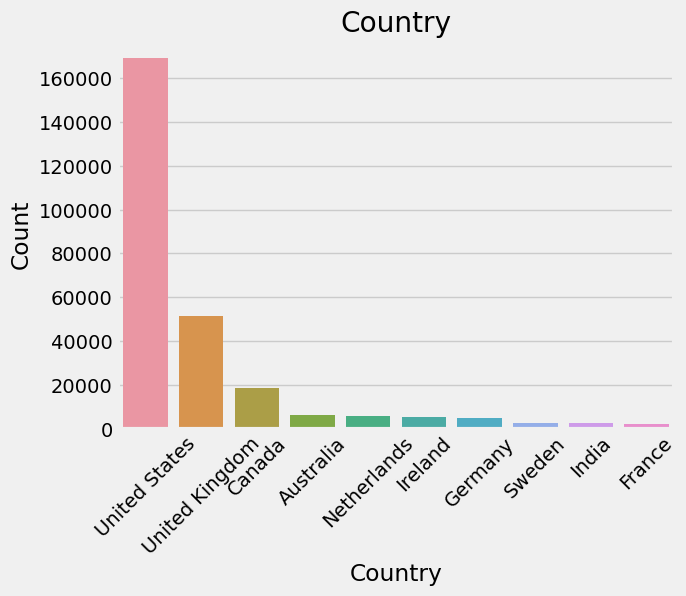

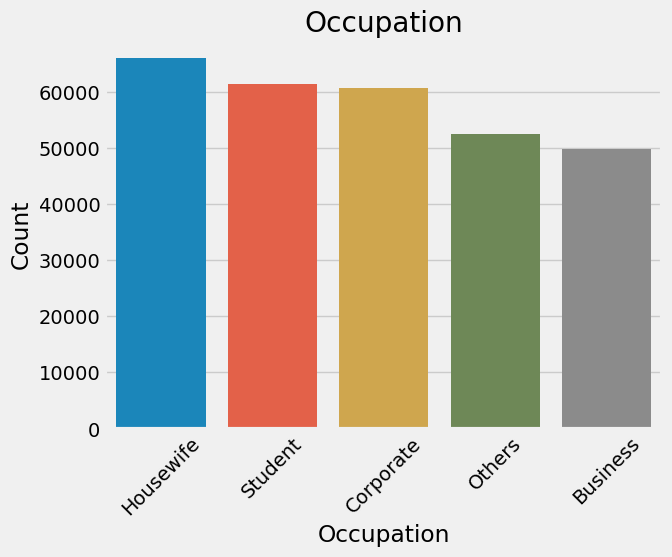

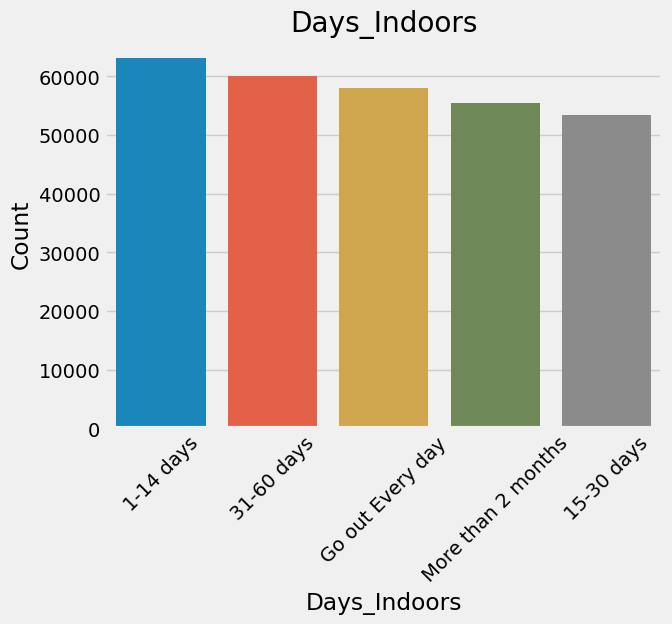

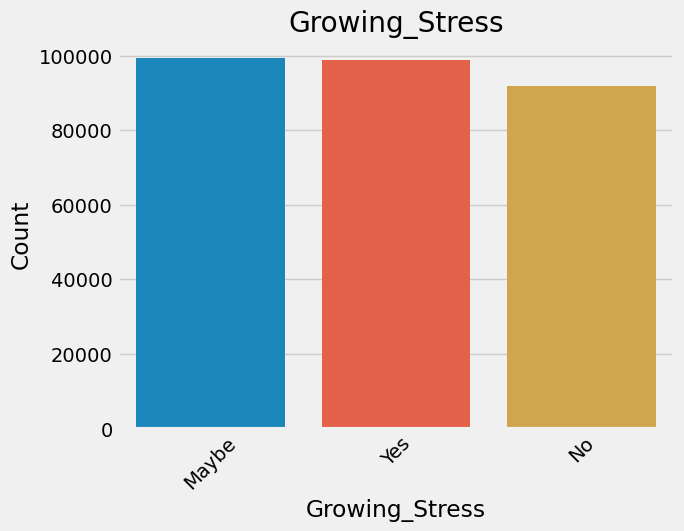

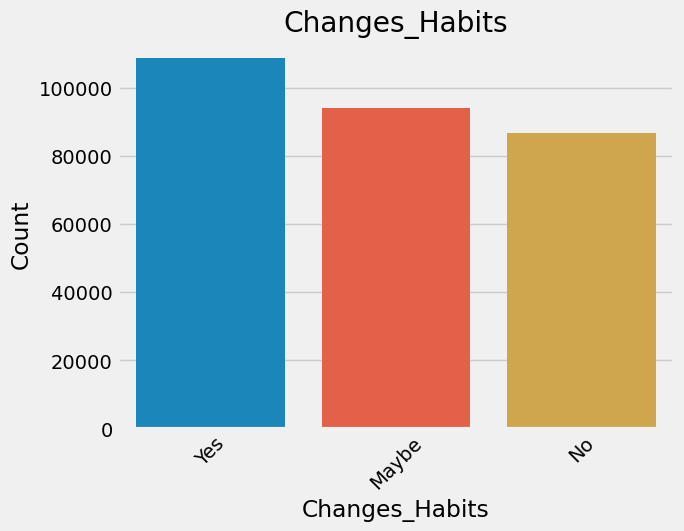

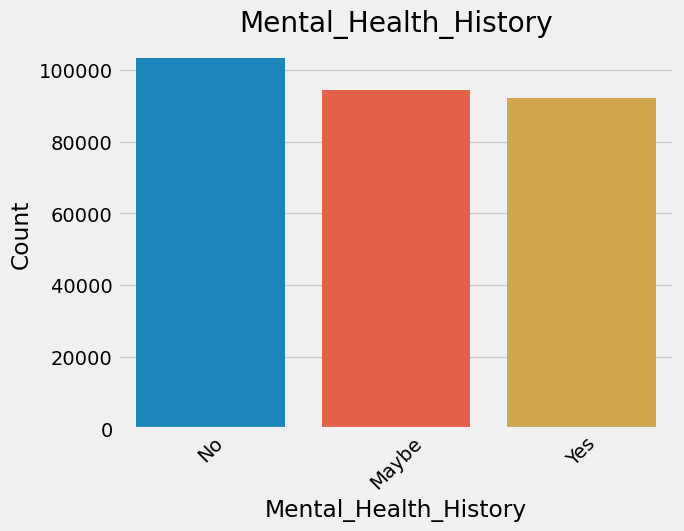

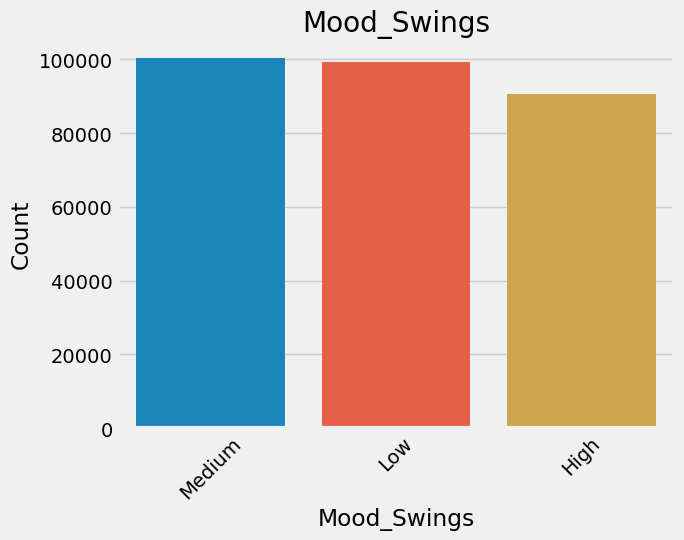

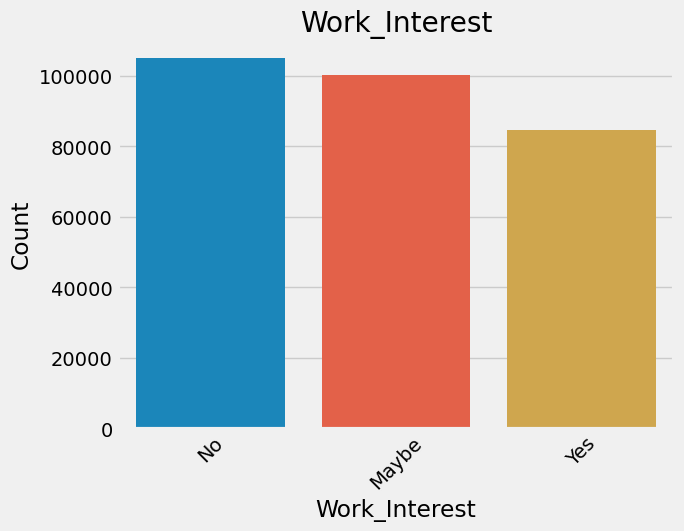

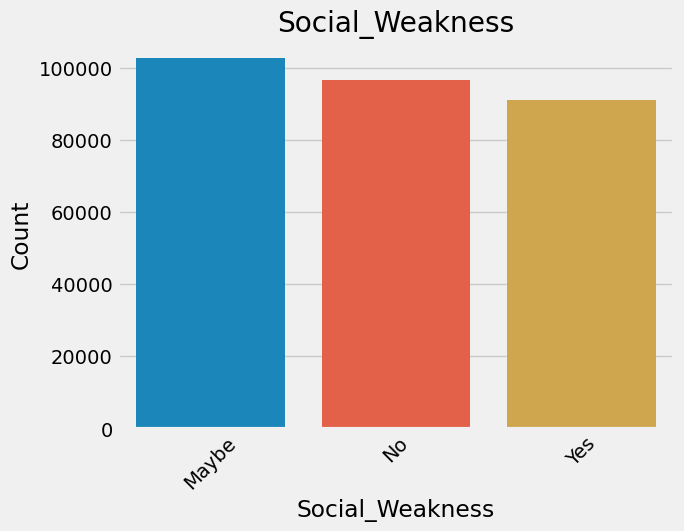

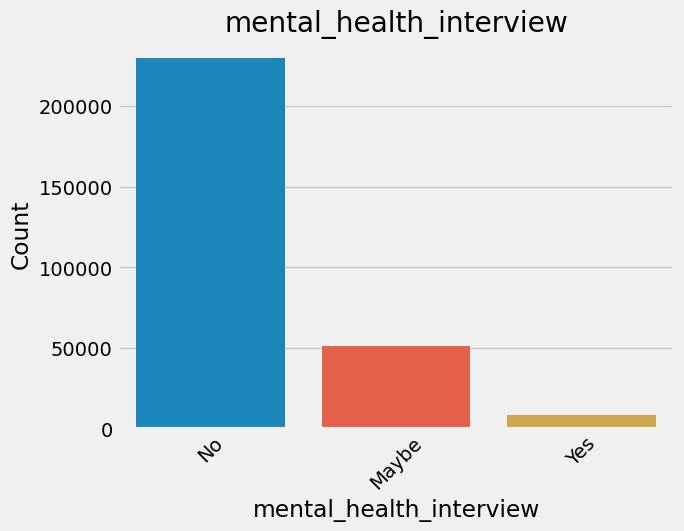

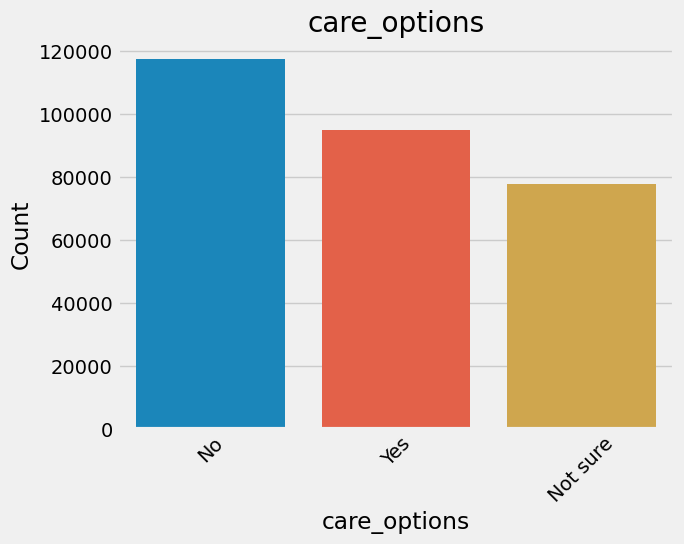

In [85]:
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)
